In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.linear_model import LinearRegression
rc('font', family='Malgun Gothic')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)  # 모든 열 출력
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df_bf_new = pd.read_csv('금리구간별_신규_병합.csv')
df_bf_qt = pd.read_csv('금리구간별_잔액_병합.csv')
df_avr_qt = pd.read_csv('평균금리_잔액_병합.csv')
df_avr_new = pd.read_csv('평균금리_신규_병합.csv')
df_dif_new = pd.read_csv('예대금리차_신규_병합.csv')
data = pd.read_csv('iM뱅크건전성데이터.csv')

In [4]:
data

,시점,총여신,기업여신,기업여신비율,가계여신,가계여신비율,신용카드여신,신용카드여신비율,총고정이하여신,총고정이하여신비율,기업고정이하여신,기업고정이하여신비율,가계고정이하여신,가계고정이하여신비율,신용카드고정이하여신,신용카드고정이하여신비율,총무수익여신,무수익여신비율,기업무수익여신,기업무수익여신비율,가계무수익여신,가계무수익여신비율,신용카드무수익여신,신용카드무수익여신비율,무수익여신산정대상기준,대손충당금적립률
0,202201,492551,334894,67.99,153524,31.17,4133,0.84,2396,0.49,2081,0.62,269,0.18,46,1.11,1569,0.32,1261,0.38,263,0.17,45,1.09,3398,141.82
1,202202,507178,344469,67.92,158297,31.21,4412,0.87,2250,0.44,1879,0.55,303,0.19,68,1.54,1430,0.28,1068,0.31,294,0.19,68,1.54,3718,165.24
2,202203,516259,347868,67.38,164102,31.79,4289,0.83,2169,0.42,1847,0.53,269,0.16,53,1.24,1308,0.25,995,0.29,260,0.16,53,1.24,3728,171.88
3,202204,524415,348351,66.43,171542,32.71,4522,0.86,3124,0.60,2763,0.79,296,0.17,65,1.44,2316,0.44,1967,0.56,286,0.17,64,1.42,4278,136.94
4,202301,523948,344704,65.79,174767,33.36,4477,0.85,3151,0.60,2670,0.77,400,0.23,81,1.81,2269,0.43,1812,0.53,377,0.22,80,1.79,4560,144.72
5,202302,538332,350928,65.19,182838,33.96,4566,0.85,3131,0.58,2402,0.68,613,0.34,116,2.54,2071,0.38,1368,0.39,588,0.32,115,2.52,5051,161.32
6,202303,559364,358787,64.14,196099,35.06,4478,0.80,3125,0.56,2543,0.71,507,0.26,75,1.67,2253,0.40,1690,0.47,488,0.25,75,1.67,5235,167.52
7,202304,559243,356495,63.75,198163,35.43,4585,0.82,3617,0.65,2944,0.83,582,0.29,91,1.98,2412,0.43,1761,0.49,561,0.28,90,1.96,5470,151.23
8,202401,574283,365316,63.61,204563,35.62,4404,0.77,4128,0.72,3351,0.92,677,0.33,100,2.27,2975,0.52,2219,0.61,657,0.32,99,2.25,5765,139.66
9,202402,588074,373089,63.44,210733,35.83,4252,0.72,4488,0.76,3649,0.98,740,0.35,99,2.33,2919,0.50,2101,0.56,720,0.34,98,2.30,6336,141.18


In [5]:
df_avr_qt_im = df_avr_qt[df_avr_qt['은행']=='iM뱅크(구 대구은행)'].reset_index(drop=True)
df_avr_qt_im = df_avr_qt_im.drop(columns = '은행')
df_avr_qt_im = df_avr_qt_im.pivot(index = '년_분기',columns = '구분',values = '평균 금리').reset_index()
df_avr_qt_im

구분,년_분기,가감조정금리,가산금리,기준금리,대출금리
0,23_02,1.19,3.28,2.64,4.73
1,23_03,1.27,3.31,2.68,4.72
2,23_04,1.33,3.39,2.78,4.84
3,24_01,1.54,3.45,2.83,4.74
4,24_02,1.60,3.52,2.84,4.76
5,24_03,1.70,3.47,2.86,4.63


In [6]:
df_bf_qt_im = df_bf_qt[df_bf_qt['은행']=='iM뱅크(구 대구은행)'].reset_index(drop=True)
df_bf_qt_im = df_bf_qt_im.drop(columns = '은행')
df_bf_qt_im

,3%미만,3~4%미만,4~5%미만,5~6%미만,6~7%미만,7~8%미만,8~9%미만,9~10%미만,10%이상,합계,평균금리,년_분기
0,33.00,10.10,15.70,16.60,10.3,6.3,3.3,2.2,2.50,100.00,4.73,23_02
1,32.40,9.70,18.60,15.00,9.6,6.1,3.70,2.30,2.60,100.00,4.72,23_03
2,30.70,7.50,21.00,15.90,9.6,5.9,3.70,2.00,3.70,100.00,4.84,23_04
3,28.10,15.40,20.60,14.50,7.9,4.7,3.00,1.90,3.90,100.00,4.74,24_01
4,26.00,17.00,22.90,13.80,7.1,4.30,2.70,1.70,4.50,100.00,4.76,24_02
5,22.70,23.20,23.50,13.10,6.10,3.80,2.40,1.30,3.90,100.00,4.63,24_03


In [7]:
df_bf_new_im = df_bf_new[df_bf_new['은행']=='iM뱅크(구 대구은행)'].reset_index(drop = True)
df_bf_new_im

,은행,3%미만,3~4%미만,4~5%미만,5~6%미만,6~7%미만,7~8%미만,8~9%미만,9~10%미만,10%이상,합계,평균금리,년월
0,iM뱅크(구 대구은행),-,3.30,49.40,7.60,7.10,11.60,10.10,4.80,6.10,100.00,5.96,2307
1,iM뱅크(구 대구은행),-,9.40,50.30,6.40,6.50,9.40,8.40,4.20,5.40,100.00,5.70,2308
2,iM뱅크(구 대구은행),-,8.70,47.00,6.90,7.80,10.10,8.40,5.40,5.70,100.00,5.87,2309
3,iM뱅크(구 대구은행),-,9.60,44.00,6.10,7.90,8.60,11.20,5.90,6.70,100.00,6.04,2310
4,iM뱅크(구 대구은행),-,2.20,46.70,8.30,8.60,7.60,10.10,4.40,12.10,100.00,6.39,2311
5,iM뱅크(구 대구은행),-,0.10,44.20,12.10,9.20,5.40,7.50,2.00,19.50,100.00,6.77,2312
6,iM뱅크(구 대구은행),-,-,30.90,14.30,11.30,4.50,10.60,3.40,25.00,100.00,7.27,2401
7,iM뱅크(구 대구은행),-,41.00,25.70,5.10,7.20,2.80,0.40,2.70,15.10,100.00,5.72,2402
8,iM뱅크(구 대구은행),-,77.10,9.10,2.30,2.90,1.30,0.50,1.10,5.70,100.00,4.42,2403
9,iM뱅크(구 대구은행),-,66.90,10.80,4.50,3.40,1.50,2.70,1.20,9.00,100.00,4.92,2404


In [8]:
df_avr_new_im = df_avr_new[df_avr_new['은행']=='iM뱅크(구 대구은행)'].reset_index(drop = True)
df_avr_new_im

,은행,구분,1000~951점,950~901점,900~851점,850~801점,800~751점,750~701점,700~651점,650~601점,600점이하,평균금리,평균신용점수,CB회사명,년월
0,iM뱅크(구 대구은행),대출금리,4.67,4.87,5.62,6.40,7.56,7.97,8.41,9.36,9.40,5.96,866.00,KCB,2307
1,iM뱅크(구 대구은행),기준금리,3.59,3.59,3.67,3.69,3.76,3.76,3.77,3.80,3.80,3.66,866.00,KCB,2307
2,iM뱅크(구 대구은행),가산금리,3.72,3.81,3.82,4.19,4.68,5.01,5.29,5.78,5.93,4.19,866.00,KCB,2307
3,iM뱅크(구 대구은행),가감조정금리,2.64,2.53,1.87,1.48,0.88,0.80,0.65,0.22,0.33,1.89,866.00,KCB,2307
4,iM뱅크(구 대구은행),대출금리,4.43,4.83,5.37,6.25,7.71,7.89,8.58,9.13,9.59,5.70,878.00,KCB,2308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,iM뱅크(구 대구은행),가감조정금리,2.71,2.64,2.45,2.17,1.88,1.58,2.74,1.56,0.81,2.63,950.42,KCB,2410
64,iM뱅크(구 대구은행),대출금리,3.52,3.71,4.07,4.82,5.29,5.96,3.94,5.17,6.08,3.67,957.88,KCB,2411
65,iM뱅크(구 대구은행),기준금리,3.37,3.37,3.37,3.36,3.36,3.35,3.40,3.38,3.38,3.37,957.88,KCB,2411
66,iM뱅크(구 대구은행),가산금리,2.91,2.96,3.12,3.52,3.88,4.30,3.09,3.80,2.87,2.97,957.88,KCB,2411


In [9]:
# 1. 일반 10% 계급 상승, 중금리 , 2% 상승
### 0~7% 일반
### 7~ 중금리
# 1-1. 위험프리미엄 감소
### 위험프리미엄 감소만큼 대손충당금도 비슷한 비율로 감소할 것으로 판단
### 차액만큼 남는 대손충당금이 생기니 다른 투자가능
## 1-2. 대출금 늘리기
### 상승이라 판단되는 고객들에게 대출한도만을 늘려줘서 이익을 챙기기
# 2.파격적으로 수치조정(논문그대로) (일반 25.6%, 중금리 6.8%)

In [11]:
# 대출월별로 보기

In [12]:
def func1(time): # 해당 월의 금리구간별 위험프리미엄과 예대금리차 df를 만드는 함수
    q =df_avr_new_im[df_avr_new_im['년월'].isin([time])]
    e = df_dif_new[df_dif_new['년월'].isin([time])]
    w= df_bf_new_im[df_bf_new_im['년월'].isin([time])]
    w = w.replace('-', 0)
    w = w.iloc[:,1:10].reset_index(drop= True).T.astype(float)
    w['구간평균금리'] = [2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]
    qq = q.reset_index(drop =True).T.iloc[2:11,0:4].astype(float)
    qq['예대금리차']= e.reset_index(drop=True).T.iloc[2:11,1].astype(float)
    qq['위험프리미엄'] = qq[2] - qq[3]
    qq.columns = ['대출금리','기준금리','가산금리','가감조정금리','예대금리차','위험프리미엄']
    
    
    # 1번째 회귀(위험프리미엄)
    X_1 = np.array(qq['대출금리']).reshape(-1,1)
    y_1 = np.array(qq['위험프리미엄'])
    
    # 모델 생성 및 학습
    model_1 = LinearRegression()
    model_1.fit(X_1, y_1)
    
    # 예측 값
    y_1_pred = model_1.predict(X_1)
    y_1_list = []
    for i in w['구간평균금리']:
        x = i
        y =(x * model_1.coef_[0]) + model_1.intercept_
        if y <0:
            y_1_list.append(0) # 음수가 나오면 0대입
        else:
            y_1_list.append(y)

    w['위험프리미엄'] = y_1_list
    # 기존 위험수익률
#    aaa = ((w[0]/100) * w['위험프리미엄']).sum()
 #   aaa

    

    # 2번째 회귀(예대금리차)
    X_2 = np.array(qq['대출금리']).reshape(-1,1)
    y_2 = np.array(qq['예대금리차'])
    
    model_2 = LinearRegression()
    model_2.fit(X_2, y_2)

    #예측값
    y_2_pred = model_2.predict(X_2)
                            
    y_2_list = []
    for i in w['구간평균금리']:
        x = i
        y =(x * model_2.coef_[0]) + model_2.intercept_
        if y <0:
            y_2_list.append(0) # 음수가 나오면 0대입
        else:
            y_2_list.append(y)

    w['예대금리차'] = y_2_list


    

    return w


w =func1(2307)
w

,0,구간평균금리,위험프리미엄,예대금리차
3%미만,0.00,2.50,0.00,0.00
3~4%미만,3.30,3.50,0.00,0.20
4~5%미만,49.40,4.50,0.90,1.20
5~6%미만,7.60,5.50,1.86,2.20
6~7%미만,7.10,6.50,2.81,3.20
7~8%미만,11.60,7.50,3.77,4.20
8~9%미만,10.10,8.50,4.72,5.20
9~10%미만,4.80,9.50,5.68,6.20
10%이상,6.10,10.50,6.64,7.20


In [13]:
def risk_premium(w,norm_increase,middle_increase):
    zz= w[[0]].T.copy()
    # 1 이상인 컬럼이 그 달의 최대 신용금리라 판단하고 거기서 부터 등급 up
    k = 0
    a = 0
    while a<1:
        a = zz.iloc[:,k].values[0]
        k+=1
        
    for i in range(k-1,4):
        a = zz.columns[i]
        b = zz.columns[i+1]
        zz[a] = zz[a] + (zz[b] * norm_increase) # 일반금리 등급별 상승
        zz[b] = zz[b] * (1-norm_increase)
    
    
    for i in range(4,8):
        a = zz.columns[i]
        b = zz.columns[i+1]
        zz[a] = zz[a] + (zz[b] * middle_increase) # 중금리(7퍼 이상) 
        zz[b] = zz[b] * (1-middle_increase)


    return zz.T

risk_premium(w,0.256,0.068).T # 등급업 시키는 함수

,3%미만,3~4%미만,4~5%미만,5~6%미만,6~7%미만,7~8%미만,8~9%미만,9~10%미만,10%이상
0,0.00,15.95,38.70,7.47,6.07,11.50,9.74,4.89,5.69


In [14]:
def loan_limit(w,norm_increase,middle_increase,limit_increase):
    xx= w[[0]].T.copy()
        
    for i in range(0,5):
        a = xx.columns[i]
        xx[a] = xx[a] + (xx[a] * norm_increase*limit_increase) # 등급상승판단비율 * 상승한도
    
    
    for i in range(5,9):
        a = xx.columns[i]
        xx[a] = xx[a] + (xx[a] * middle_increase*limit_increase) # 중금리(7퍼 이상) 

    return xx.T

loan_limit(w,0.1,0.02,0.1) # 한도상승 시키는 함수(ex: 일반: 10퍼 고객 등급상향가능, 중금리 2퍼 등급상향가능, 상향고객에게 한도 10퍼 늘려준다 가정)

,0
3%미만,0.00
3~4%미만,3.33
4~5%미만,49.89
5~6%미만,7.68
6~7%미만,7.17
7~8%미만,11.62
8~9%미만,10.12
9~10%미만,4.81
10%이상,6.11


In [15]:
time = 2401
norm_increase = 0.1
middle_increase = 0.02
limit_increase = 0.1

def risk_benefit(time,norm_increase,middle_increase,limit_increase):
    df = func1(time)
    df['상향조정비율'] = risk_premium(df,norm_increase,middle_increase)
    df['한도상향후'] = loan_limit(df,norm_increase,middle_increase,limit_increase)
    
    risk_before = (df[0] * df['위험프리미엄']).sum()/100
    risk_after = (df['상향조정비율'] * df['위험프리미엄']).sum()/100
    risk_down = ((risk_before-risk_after) / risk_before*100).round(2)
    
    
    loan_before = (df[0] * df['예대금리차']).sum()/100
    loan_after = (df['한도상향후'] * df['예대금리차']).sum()/100
    benefit_up = ((loan_after-loan_before)/loan_before*100).round(2)

    return risk_before, risk_after, risk_down, loan_before, loan_after, benefit_up


risk_before, risk_after, risk_down, loan_before, loan_after, benefit_up= risk_benefit(time,norm_increase,middle_increase,limit_increase)


print('기존리스크',risk_before,'%')
print('변경후리스크',risk_after,'%')
print('리스크 감소율',risk_down,'%')
print('')
print('기존이익',loan_before,'%')
print('바뀐이익',loan_after,'%')
print('이익상승률 : ',benefit_up,'%')



기존리스크 3.1932855742702806 %
변경후리스크 3.1586886700538765 %
리스크 감소율 1.08 %

기존이익 3.398 %
바뀐이익 3.4113640000000003 %
이익상승률 :  0.39 %


In [16]:
# 최종코드
## 1.논문적용, 대출한도 10퍼

In [17]:


time = 0
norm_increase = 0.256
middle_increase = 0.068
limit_increase = 0.1

columns_name = ['기존리스크이자','변경후리스크이자','리스크감소율','기존이익','바뀐이익','이익상승률']
data = pd.DataFrame(index = columns_name)

for i in df_bf_new_im['년월'].unique():
    time = i
    risk_before, risk_after, risk_down, loan_before, loan_after, benefit_up= risk_benefit(time,norm_increase,middle_increase,limit_increase)
    list_a = [risk_before, risk_after, risk_down, loan_before, loan_after, benefit_up]
    data[i] = list_a

ud = data.T.reset_index()
ud['리스크차이(%p)']= ud['기존리스크이자']-ud['변경후리스크이자']
ud['이익차익(%p)']= (ud['바뀐이익']-ud['기존이익'])
ud['평균금리'] = df_bf_new_im['평균금리']

nim = df_bf_new_im.replace('-', 0)
nim.iloc[:,1:10] = nim.iloc[:,1:10].astype(float)
ud['저금리고객비율'] = nim[nim.columns[1:6]].sum(axis=1)
ud['중금리고객비율'] = nim[nim.columns[6:10]].sum(axis=1)
ud


,index,기존리스크이자,변경후리스크이자,리스크감소율,기존이익,바뀐이익,이익상승률,리스크차이(%p),이익차익(%p),평균금리,저금리고객비율,중금리고객비율
0,2307,2.38,2.21,7.20,2.74,2.78,1.36,0.17,0.04,5.96,67.40,32.60
1,2308,2.05,1.90,7.62,2.22,2.25,1.36,0.16,0.03,5.70,72.60,27.40
2,2309,2.17,2.01,6.94,2.31,2.34,1.32,0.15,0.03,5.87,70.40,29.60
3,2310,2.25,2.11,6.23,2.41,2.44,1.24,0.14,0.03,6.04,67.60,32.40
4,2311,2.43,2.28,5.95,2.38,2.41,1.16,0.14,0.03,6.39,65.80,34.20
5,2312,2.57,2.49,2.98,2.52,2.55,1.14,0.08,0.03,6.77,65.60,34.40
6,2401,3.19,3.10,3.00,3.40,3.44,1.13,0.10,0.04,7.27,56.50,43.50
7,2402,1.77,1.68,5.23,1.88,1.90,1.22,0.09,0.02,5.72,79.00,21.00
8,2403,0.72,0.68,5.19,0.75,0.76,1.22,0.04,0.01,4.42,91.40,8.60
9,2404,1.15,1.09,4.66,1.22,1.23,1.17,0.05,0.01,4.92,85.60,14.40


In [18]:
ud.to_csv('zzzz.csv',encoding = 'utf-8-sig')

In [19]:
ud[['리스크감소율','이익상승률','리스크차이(%p)', '이익차익(%p)', '평균금리', '저금리고객비율', '중금리고객비율']]

,리스크감소율,이익상승률,리스크차이(%p),이익차익(%p),평균금리,저금리고객비율,중금리고객비율
0,7.20,1.36,0.17,0.04,5.96,67.40,32.60
1,7.62,1.36,0.16,0.03,5.70,72.60,27.40
2,6.94,1.32,0.15,0.03,5.87,70.40,29.60
3,6.23,1.24,0.14,0.03,6.04,67.60,32.40
4,5.95,1.16,0.14,0.03,6.39,65.80,34.20
5,2.98,1.14,0.08,0.03,6.77,65.60,34.40
6,3.00,1.13,0.10,0.04,7.27,56.50,43.50
7,5.23,1.22,0.09,0.02,5.72,79.00,21.00
8,5.19,1.22,0.04,0.01,4.42,91.40,8.60
9,4.66,1.17,0.05,0.01,4.92,85.60,14.40


In [20]:
ud[['리스크감소율','이익상승률','리스크차이(%p)', '이익차익(%p)', '평균금리', '저금리고객비율', '중금리고객비율']].corr()

,리스크감소율,이익상승률,리스크차이(%p),이익차익(%p),평균금리,저금리고객비율,중금리고객비율
리스크감소율,1.00,0.75,0.23,-0.11,-0.60,0.54,-0.54
이익상승률,0.75,1.00,-0.33,-0.41,-0.78,0.76,-0.76
리스크차이(%p),0.23,-0.33,1.00,0.85,0.60,-0.65,0.65
이익차익(%p),-0.11,-0.41,0.85,1.00,0.83,-0.83,0.83
평균금리,-0.60,-0.78,0.60,0.83,1.00,-0.97,0.97
저금리고객비율,0.54,0.76,-0.65,-0.83,-0.97,1.00,-1.00
중금리고객비율,-0.54,-0.76,0.65,0.83,0.97,-1.00,1.00


In [21]:
# 대출한도 30% 상승!

In [22]:

time = 0
norm_increase = 0.256
middle_increase = 0.068
limit_increase = 0.3

columns_name = ['기존리스크이자','변경후리스크이자','리스크감소율','기존이익','바뀐이익','이익상승률']
data = pd.DataFrame(index = columns_name)

for i in df_bf_new_im['년월'].unique():
    time = i
    risk_before, risk_after, risk_down, loan_before, loan_after, benefit_up= risk_benefit(time,norm_increase,middle_increase,limit_increase)
    list_a = [risk_before, risk_after, risk_down, loan_before, loan_after, benefit_up]
    data[i] = list_a

ud = data.T.reset_index()
ud['리스크차이(%p)']= ud['기존리스크이자']-ud['변경후리스크이자']
ud['이익차익(%p)']= (ud['바뀐이익']-ud['기존이익'])
ud['평균금리'] = df_bf_new_im['평균금리']

nim = df_bf_new_im.replace('-', 0)
nim.iloc[:,1:10] = nim.iloc[:,1:10].astype(float)
ud['저금리고객비율'] = nim[nim.columns[1:6]].sum(axis=1)
ud['중금리고객비율'] = nim[nim.columns[6:10]].sum(axis=1)
ud


,index,기존리스크이자,변경후리스크이자,리스크감소율,기존이익,바뀐이익,이익상승률,리스크차이(%p),이익차익(%p),평균금리,저금리고객비율,중금리고객비율
0,2307,2.38,2.21,7.20,2.74,2.86,4.08,0.17,0.11,5.96,67.40,32.60
1,2308,2.05,1.90,7.62,2.22,2.31,4.08,0.16,0.09,5.70,72.60,27.40
2,2309,2.17,2.01,6.94,2.31,2.40,3.96,0.15,0.09,5.87,70.40,29.60
3,2310,2.25,2.11,6.23,2.41,2.50,3.73,0.14,0.09,6.04,67.60,32.40
4,2311,2.43,2.28,5.95,2.38,2.46,3.49,0.14,0.08,6.39,65.80,34.20
5,2312,2.57,2.49,2.98,2.52,2.60,3.43,0.08,0.09,6.77,65.60,34.40
6,2401,3.19,3.10,3.00,3.40,3.51,3.40,0.10,0.12,7.27,56.50,43.50
7,2402,1.77,1.68,5.23,1.88,1.95,3.67,0.09,0.07,5.72,79.00,21.00
8,2403,0.72,0.68,5.19,0.75,0.78,3.66,0.04,0.03,4.42,91.40,8.60
9,2404,1.15,1.09,4.66,1.22,1.26,3.51,0.05,0.04,4.92,85.60,14.40


In [23]:
ud.to_csv('xxxx.csv')

In [24]:
ud[['리스크감소율','이익상승률','리스크차이(%p)', '이익차익(%p)', '평균금리', '저금리고객비율', '중금리고객비율']]

,리스크감소율,이익상승률,리스크차이(%p),이익차익(%p),평균금리,저금리고객비율,중금리고객비율
0,7.20,4.08,0.17,0.11,5.96,67.40,32.60
1,7.62,4.08,0.16,0.09,5.70,72.60,27.40
2,6.94,3.96,0.15,0.09,5.87,70.40,29.60
3,6.23,3.73,0.14,0.09,6.04,67.60,32.40
4,5.95,3.49,0.14,0.08,6.39,65.80,34.20
5,2.98,3.43,0.08,0.09,6.77,65.60,34.40
6,3.00,3.40,0.10,0.12,7.27,56.50,43.50
7,5.23,3.67,0.09,0.07,5.72,79.00,21.00
8,5.19,3.66,0.04,0.03,4.42,91.40,8.60
9,4.66,3.51,0.05,0.04,4.92,85.60,14.40


In [25]:
ud[['리스크감소율','이익상승률','리스크차이(%p)', '이익차익(%p)', '평균금리', '저금리고객비율', '중금리고객비율']].corr()

,리스크감소율,이익상승률,리스크차이(%p),이익차익(%p),평균금리,저금리고객비율,중금리고객비율
리스크감소율,1.00,0.75,0.23,-0.11,-0.60,0.54,-0.54
이익상승률,0.75,1.00,-0.33,-0.41,-0.78,0.76,-0.76
리스크차이(%p),0.23,-0.33,1.00,0.85,0.60,-0.65,0.65
이익차익(%p),-0.11,-0.41,0.85,1.00,0.83,-0.83,0.83
평균금리,-0.60,-0.78,0.60,0.83,1.00,-0.97,0.97
저금리고객비율,0.54,0.76,-0.65,-0.83,-0.97,1.00,-1.00
중금리고객비율,-0.54,-0.76,0.65,0.83,0.97,-1.00,1.00


C:\Users\campus4D050\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\campus4D050\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


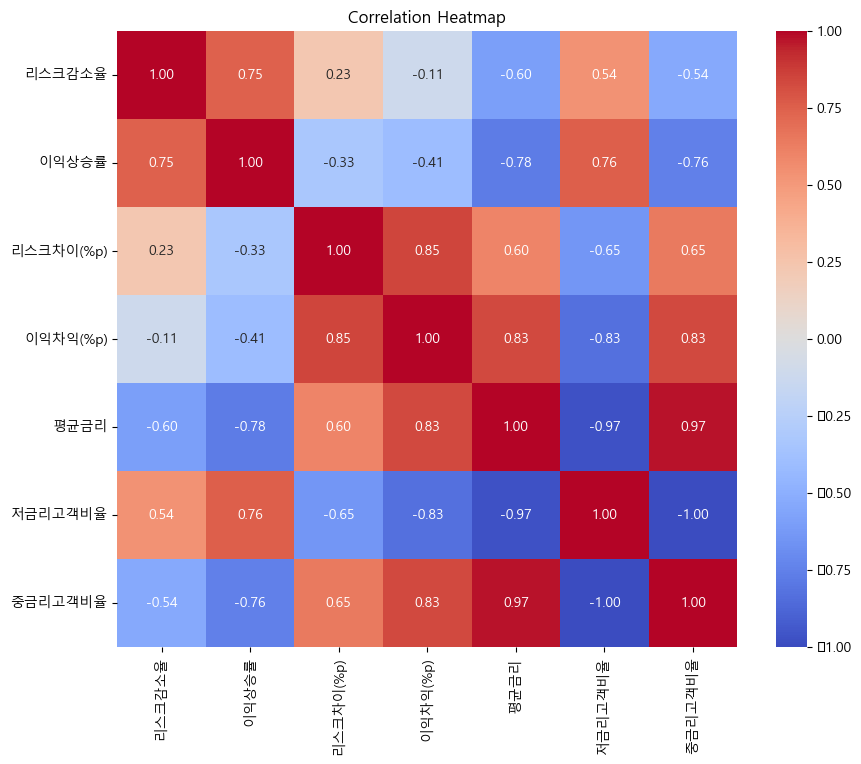

In [26]:
import seaborn as sns



# Compute correlation matrix
correlation_matrix = ud[['리스크감소율', '이익상승률', '리스크차이(%p)', '이익차익(%p)', '평균금리', '저금리고객비율', '중금리고객비율']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [27]:
data = pd.read_csv('iM뱅크건전성데이터.csv')
data

,시점,총여신,기업여신,기업여신비율,가계여신,가계여신비율,신용카드여신,신용카드여신비율,총고정이하여신,총고정이하여신비율,기업고정이하여신,기업고정이하여신비율,가계고정이하여신,가계고정이하여신비율,신용카드고정이하여신,신용카드고정이하여신비율,총무수익여신,무수익여신비율,기업무수익여신,기업무수익여신비율,가계무수익여신,가계무수익여신비율,신용카드무수익여신,신용카드무수익여신비율,무수익여신산정대상기준,대손충당금적립률
0,202201,492551,334894,67.99,153524,31.17,4133,0.84,2396,0.49,2081,0.62,269,0.18,46,1.11,1569,0.32,1261,0.38,263,0.17,45,1.09,3398,141.82
1,202202,507178,344469,67.92,158297,31.21,4412,0.87,2250,0.44,1879,0.55,303,0.19,68,1.54,1430,0.28,1068,0.31,294,0.19,68,1.54,3718,165.24
2,202203,516259,347868,67.38,164102,31.79,4289,0.83,2169,0.42,1847,0.53,269,0.16,53,1.24,1308,0.25,995,0.29,260,0.16,53,1.24,3728,171.88
3,202204,524415,348351,66.43,171542,32.71,4522,0.86,3124,0.60,2763,0.79,296,0.17,65,1.44,2316,0.44,1967,0.56,286,0.17,64,1.42,4278,136.94
4,202301,523948,344704,65.79,174767,33.36,4477,0.85,3151,0.60,2670,0.77,400,0.23,81,1.81,2269,0.43,1812,0.53,377,0.22,80,1.79,4560,144.72
5,202302,538332,350928,65.19,182838,33.96,4566,0.85,3131,0.58,2402,0.68,613,0.34,116,2.54,2071,0.38,1368,0.39,588,0.32,115,2.52,5051,161.32
6,202303,559364,358787,64.14,196099,35.06,4478,0.80,3125,0.56,2543,0.71,507,0.26,75,1.67,2253,0.40,1690,0.47,488,0.25,75,1.67,5235,167.52
7,202304,559243,356495,63.75,198163,35.43,4585,0.82,3617,0.65,2944,0.83,582,0.29,91,1.98,2412,0.43,1761,0.49,561,0.28,90,1.96,5470,151.23
8,202401,574283,365316,63.61,204563,35.62,4404,0.77,4128,0.72,3351,0.92,677,0.33,100,2.27,2975,0.52,2219,0.61,657,0.32,99,2.25,5765,139.66
9,202402,588074,373089,63.44,210733,35.83,4252,0.72,4488,0.76,3649,0.98,740,0.35,99,2.33,2919,0.50,2101,0.56,720,0.34,98,2.30,6336,141.18


In [28]:
ud[['index','리스크감소율','이익상승률','리스크차이(%p)', '이익차익(%p)', '평균금리', '저금리고객비율', '중금리고객비율']]

,index,리스크감소율,이익상승률,리스크차이(%p),이익차익(%p),평균금리,저금리고객비율,중금리고객비율
0,2307,7.20,4.08,0.17,0.11,5.96,67.40,32.60
1,2308,7.62,4.08,0.16,0.09,5.70,72.60,27.40
2,2309,6.94,3.96,0.15,0.09,5.87,70.40,29.60
3,2310,6.23,3.73,0.14,0.09,6.04,67.60,32.40
4,2311,5.95,3.49,0.14,0.08,6.39,65.80,34.20
5,2312,2.98,3.43,0.08,0.09,6.77,65.60,34.40
6,2401,3.00,3.40,0.10,0.12,7.27,56.50,43.50
7,2402,5.23,3.67,0.09,0.07,5.72,79.00,21.00
8,2403,5.19,3.66,0.04,0.03,4.42,91.40,8.60
9,2404,4.66,3.51,0.05,0.04,4.92,85.60,14.40


In [29]:
data['가계고정이하여신비율'].iloc[6:11]

6    0.26
7    0.29
8    0.33
9    0.35
10   0.35
Name: 가계고정이하여신비율, dtype: float64

In [30]:
k = ud[['index','리스크감소율','이익상승률','리스크차이(%p)', '이익차익(%p)', '평균금리', '저금리고객비율', '중금리고객비율']]
x = data['가계고정이하여신비율'].iloc[6:11].reset_index(drop=True)
k['가계고정이하여신비율']= np.nan
for i in range(0,len(x)):
    a = i*3
    k['가계고정이하여신비율'].iloc[a:a+3] = x[i]

k

C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\3737123504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['가계고정이하여신비율']= np.nan
C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\3737123504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['가계고정이하여신비율'].iloc[a:a+3] = x[i]
C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\3737123504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,index,리스크감소율,이익상승률,리스크차이(%p),이익차익(%p),평균금리,저금리고객비율,중금리고객비율,가계고정이하여신비율
0,2307,7.20,4.08,0.17,0.11,5.96,67.40,32.60,0.26
1,2308,7.62,4.08,0.16,0.09,5.70,72.60,27.40,0.26
2,2309,6.94,3.96,0.15,0.09,5.87,70.40,29.60,0.26
3,2310,6.23,3.73,0.14,0.09,6.04,67.60,32.40,0.29
4,2311,5.95,3.49,0.14,0.08,6.39,65.80,34.20,0.29
5,2312,2.98,3.43,0.08,0.09,6.77,65.60,34.40,0.29
6,2401,3.00,3.40,0.10,0.12,7.27,56.50,43.50,0.33
7,2402,5.23,3.67,0.09,0.07,5.72,79.00,21.00,0.33
8,2403,5.19,3.66,0.04,0.03,4.42,91.40,8.60,0.33
9,2404,4.66,3.51,0.05,0.04,4.92,85.60,14.40,0.35


In [31]:
ud

,index,기존리스크이자,변경후리스크이자,리스크감소율,기존이익,바뀐이익,이익상승률,리스크차이(%p),이익차익(%p),평균금리,저금리고객비율,중금리고객비율
0,2307,2.38,2.21,7.20,2.74,2.86,4.08,0.17,0.11,5.96,67.40,32.60
1,2308,2.05,1.90,7.62,2.22,2.31,4.08,0.16,0.09,5.70,72.60,27.40
2,2309,2.17,2.01,6.94,2.31,2.40,3.96,0.15,0.09,5.87,70.40,29.60
3,2310,2.25,2.11,6.23,2.41,2.50,3.73,0.14,0.09,6.04,67.60,32.40
4,2311,2.43,2.28,5.95,2.38,2.46,3.49,0.14,0.08,6.39,65.80,34.20
5,2312,2.57,2.49,2.98,2.52,2.60,3.43,0.08,0.09,6.77,65.60,34.40
6,2401,3.19,3.10,3.00,3.40,3.51,3.40,0.10,0.12,7.27,56.50,43.50
7,2402,1.77,1.68,5.23,1.88,1.95,3.67,0.09,0.07,5.72,79.00,21.00
8,2403,0.72,0.68,5.19,0.75,0.78,3.66,0.04,0.03,4.42,91.40,8.60
9,2404,1.15,1.09,4.66,1.22,1.26,3.51,0.05,0.04,4.92,85.60,14.40


C:\Users\campus4D050\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


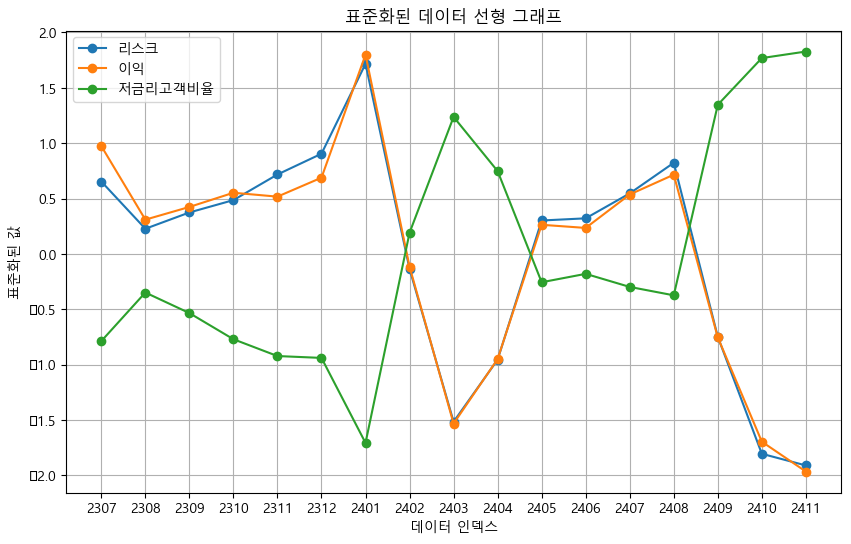

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(ud[['기존리스크이자', '기존이익', '저금리고객비율']])

# 표준화된 데이터를 데이터프레임으로 변환
standardized_df = pd.DataFrame(standardized_data, columns=['리스크', '이익', '저금리고객비율'])

# 선형 플랏 그리기
plt.figure(figsize=(10, 6))
for column in standardized_df.columns:
    plt.plot(ud['index'].astype(str), standardized_df[column], label=column, marker='o')

# 그래프 꾸미기
plt.title("표준화된 데이터 선형 그래프")
plt.xlabel("데이터 인덱스")
plt.ylabel("표준화된 값")
plt.legend()
plt.grid()
plt.show()


In [33]:
standardized_df.to_csv('3_리스크.csv')

C:\Users\campus4D050\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


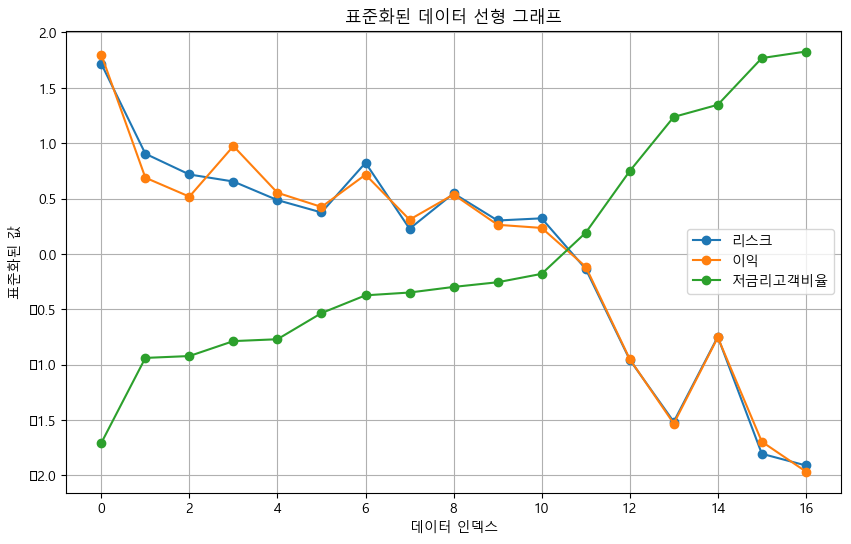

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(ud[['기존리스크이자', '기존이익', '저금리고객비율']].sort_values(by = '저금리고객비율'))

# 표준화된 데이터를 데이터프레임으로 변환
standardized_df = pd.DataFrame(standardized_data, columns=['리스크', '이익', '저금리고객비율'])

# 선형 플랏 그리기
plt.figure(figsize=(10, 6))
for column in standardized_df.columns:
    plt.plot(standardized_df.index, standardized_df[column], label=column, marker='o')

# 그래프 꾸미기
plt.title("표준화된 데이터 선형 그래프")
plt.xlabel("데이터 인덱스")
plt.ylabel("표준화된 값")
plt.legend()
plt.grid()
plt.show()

In [35]:
data

,시점,총여신,기업여신,기업여신비율,가계여신,가계여신비율,신용카드여신,신용카드여신비율,총고정이하여신,총고정이하여신비율,기업고정이하여신,기업고정이하여신비율,가계고정이하여신,가계고정이하여신비율,신용카드고정이하여신,신용카드고정이하여신비율,총무수익여신,무수익여신비율,기업무수익여신,기업무수익여신비율,가계무수익여신,가계무수익여신비율,신용카드무수익여신,신용카드무수익여신비율,무수익여신산정대상기준,대손충당금적립률
0,202201,492551,334894,67.99,153524,31.17,4133,0.84,2396,0.49,2081,0.62,269,0.18,46,1.11,1569,0.32,1261,0.38,263,0.17,45,1.09,3398,141.82
1,202202,507178,344469,67.92,158297,31.21,4412,0.87,2250,0.44,1879,0.55,303,0.19,68,1.54,1430,0.28,1068,0.31,294,0.19,68,1.54,3718,165.24
2,202203,516259,347868,67.38,164102,31.79,4289,0.83,2169,0.42,1847,0.53,269,0.16,53,1.24,1308,0.25,995,0.29,260,0.16,53,1.24,3728,171.88
3,202204,524415,348351,66.43,171542,32.71,4522,0.86,3124,0.60,2763,0.79,296,0.17,65,1.44,2316,0.44,1967,0.56,286,0.17,64,1.42,4278,136.94
4,202301,523948,344704,65.79,174767,33.36,4477,0.85,3151,0.60,2670,0.77,400,0.23,81,1.81,2269,0.43,1812,0.53,377,0.22,80,1.79,4560,144.72
5,202302,538332,350928,65.19,182838,33.96,4566,0.85,3131,0.58,2402,0.68,613,0.34,116,2.54,2071,0.38,1368,0.39,588,0.32,115,2.52,5051,161.32
6,202303,559364,358787,64.14,196099,35.06,4478,0.80,3125,0.56,2543,0.71,507,0.26,75,1.67,2253,0.40,1690,0.47,488,0.25,75,1.67,5235,167.52
7,202304,559243,356495,63.75,198163,35.43,4585,0.82,3617,0.65,2944,0.83,582,0.29,91,1.98,2412,0.43,1761,0.49,561,0.28,90,1.96,5470,151.23
8,202401,574283,365316,63.61,204563,35.62,4404,0.77,4128,0.72,3351,0.92,677,0.33,100,2.27,2975,0.52,2219,0.61,657,0.32,99,2.25,5765,139.66
9,202402,588074,373089,63.44,210733,35.83,4252,0.72,4488,0.76,3649,0.98,740,0.35,99,2.33,2919,0.50,2101,0.56,720,0.34,98,2.30,6336,141.18


C:\Users\campus4D050\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


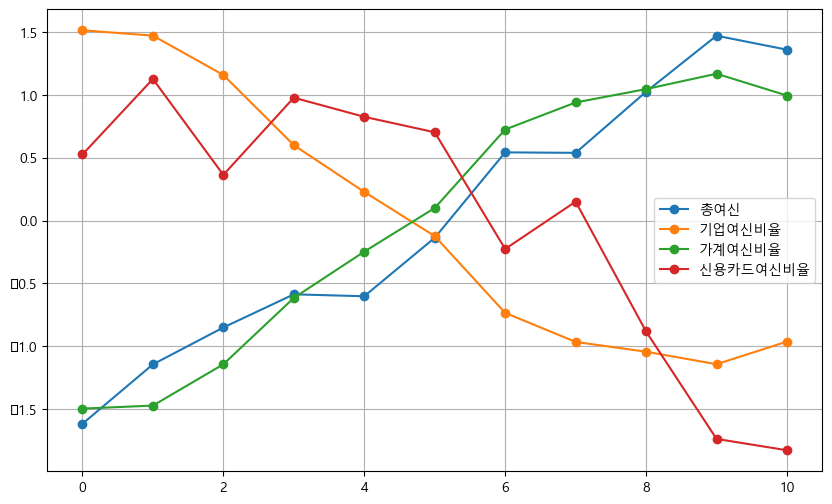

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
df = data[['총여신','기업여신비율','가계여신비율','신용카드여신비율']]
standard_data = scaler.fit_transform(df)

df_plt = pd.DataFrame(standard_data, columns=df.columns)
# 선형 플랏 그리기
plt.figure(figsize=(10, 6))
for column in df_plt.columns:
    plt.plot(df_plt.index, df_plt[column], label=column, marker='o')

# 그래프 꾸미기
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()


C:\Users\campus4D050\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


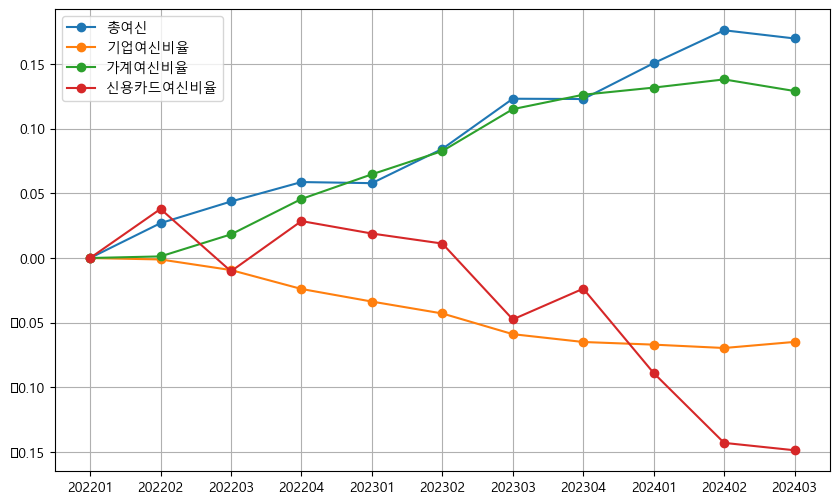

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
df = data[['총여신','기업여신비율','가계여신비율','신용카드여신비율']]
df = (df - df.iloc[0,:]) / df.iloc[:,:].mean()
standard_data = df

df_plt = pd.DataFrame(standard_data, columns=df.columns)
# 선형 플랏 그리기
plt.figure(figsize=(10, 6))
for column in df_plt.columns:
    plt.plot(data['시점'].astype(str), df_plt[column], label=column, marker='o')

# 그래프 꾸미기
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()


In [38]:
df

,총여신,기업여신비율,가계여신비율,신용카드여신비율
0,0.00,0.00,0.00,0.00
1,0.03,-0.00,0.00,0.04
2,0.04,-0.01,0.02,-0.01
3,0.06,-0.02,0.05,0.03
4,0.06,-0.03,0.06,0.02
5,0.08,-0.04,0.08,0.01
6,0.12,-0.06,0.12,-0.05
7,0.12,-0.06,0.13,-0.02
8,0.15,-0.07,0.13,-0.09
9,0.18,-0.07,0.14,-0.14


C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\986238075.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['총여신'] = df['총여신'] / df['총여신'].min()
C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\986238075.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['총고정이하여신비율'] = df['총고정이하여신비율'] / df['총고정이하여신비율'].min()
C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\986238075.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

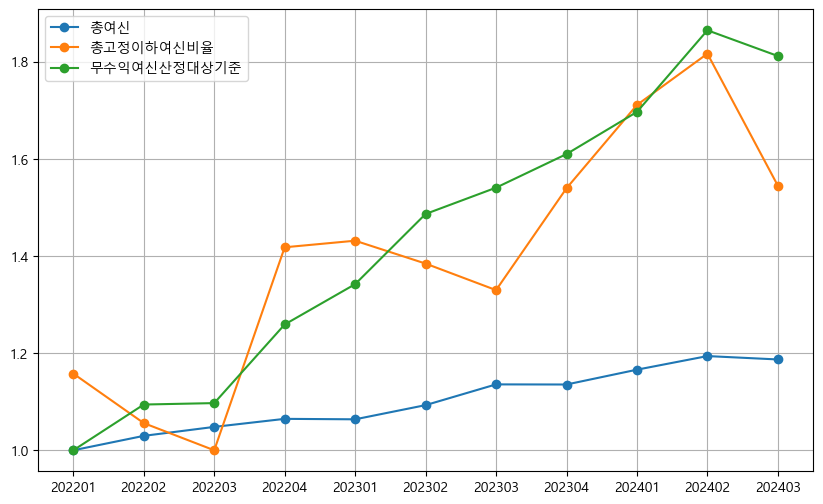

In [146]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
df = data[['총여신','총고정이하여신비율','무수익여신산정대상기준']]
df['총여신'] = df['총여신'] / df['총여신'].min()
df['총고정이하여신비율'] = df['총고정이하여신비율'] / df['총고정이하여신비율'].min()
df['무수익여신산정대상기준'] = df['무수익여신산정대상기준'] / df['무수익여신산정대상기준'].min()


df_plt = pd.DataFrame(df, columns=df.columns)
# 선형 플랏 그리기
plt.figure(figsize=(10, 6))
for column in df_plt.columns:
    plt.plot(data['시점'].astype(str), df_plt[column], label=column, marker='o')

# 그래프 꾸미기
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()


In [40]:
df

,총여신,총고정이하여신비율,무수익여신산정대상기준
0,1.00,1.16,1.00
1,1.03,1.06,1.09
2,1.05,1.00,1.10
3,1.06,1.42,1.26
4,1.06,1.43,1.34
5,1.09,1.38,1.49
6,1.14,1.33,1.54
7,1.14,1.54,1.61
8,1.17,1.71,1.70
9,1.19,1.82,1.86


In [41]:
ud['리스크감소율'].mean()

6.0711764705882345

In [104]:
data

,시점,총여신,기업여신,기업여신비율,가계여신,가계여신비율,신용카드여신,신용카드여신비율,총고정이하여신,총고정이하여신비율,기업고정이하여신,기업고정이하여신비율,가계고정이하여신,가계고정이하여신비율,신용카드고정이하여신,신용카드고정이하여신비율,총무수익여신,무수익여신비율,기업무수익여신,기업무수익여신비율,가계무수익여신,가계무수익여신비율,신용카드무수익여신,신용카드무수익여신비율,무수익여신산정대상기준,대손충당금적립률
0,202201,492551,334894,67.99,153524,31.17,4133,0.84,2396,0.49,2081,0.62,269,0.18,46,1.11,1569,0.32,1261,0.38,263,0.17,45,1.09,3398,141.82
1,202202,507178,344469,67.92,158297,31.21,4412,0.87,2250,0.44,1879,0.55,303,0.19,68,1.54,1430,0.28,1068,0.31,294,0.19,68,1.54,3718,165.24
2,202203,516259,347868,67.38,164102,31.79,4289,0.83,2169,0.42,1847,0.53,269,0.16,53,1.24,1308,0.25,995,0.29,260,0.16,53,1.24,3728,171.88
3,202204,524415,348351,66.43,171542,32.71,4522,0.86,3124,0.60,2763,0.79,296,0.17,65,1.44,2316,0.44,1967,0.56,286,0.17,64,1.42,4278,136.94
4,202301,523948,344704,65.79,174767,33.36,4477,0.85,3151,0.60,2670,0.77,400,0.23,81,1.81,2269,0.43,1812,0.53,377,0.22,80,1.79,4560,144.72
5,202302,538332,350928,65.19,182838,33.96,4566,0.85,3131,0.58,2402,0.68,613,0.34,116,2.54,2071,0.38,1368,0.39,588,0.32,115,2.52,5051,161.32
6,202303,559364,358787,64.14,196099,35.06,4478,0.80,3125,0.56,2543,0.71,507,0.26,75,1.67,2253,0.40,1690,0.47,488,0.25,75,1.67,5235,167.52
7,202304,559243,356495,63.75,198163,35.43,4585,0.82,3617,0.65,2944,0.83,582,0.29,91,1.98,2412,0.43,1761,0.49,561,0.28,90,1.96,5470,151.23
8,202401,574283,365316,63.61,204563,35.62,4404,0.77,4128,0.72,3351,0.92,677,0.33,100,2.27,2975,0.52,2219,0.61,657,0.32,99,2.25,5765,139.66
9,202402,588074,373089,63.44,210733,35.83,4252,0.72,4488,0.76,3649,0.98,740,0.35,99,2.33,2919,0.50,2101,0.56,720,0.34,98,2.30,6336,141.18


C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\1570018323.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['기업고정이하여신비율'] = df['기업고정이하여신비율'] / df['기업고정이하여신비율'].iloc[0]
C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\1570018323.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가계고정이하여신비율'] = df['가계고정이하여신비율'] / df['가계고정이하여신비율'].iloc[0]
C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\1570018323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

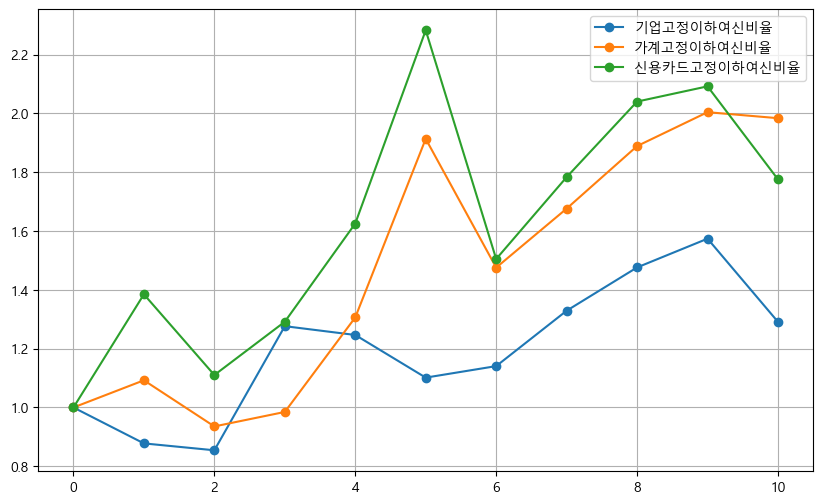

In [128]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()

df = data[['기업고정이하여신비율','가계고정이하여신비율','신용카드고정이하여신비율']]

df['기업고정이하여신비율'] = df['기업고정이하여신비율'] / df['기업고정이하여신비율'].iloc[0]
df['가계고정이하여신비율'] = df['가계고정이하여신비율'] / df['가계고정이하여신비율'].iloc[0]
df['신용카드고정이하여신비율'] = df['신용카드고정이하여신비율'] / df['신용카드고정이하여신비율'].iloc[0]


df_plt = pd.DataFrame(df, columns=df.columns)
# 선형 플랏 그리기
plt.figure(figsize=(10, 6))
for column in df_plt.columns:
    plt.plot(df_plt.index, df_plt[column], label=column, marker='o')

# 그래프 꾸미기
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()

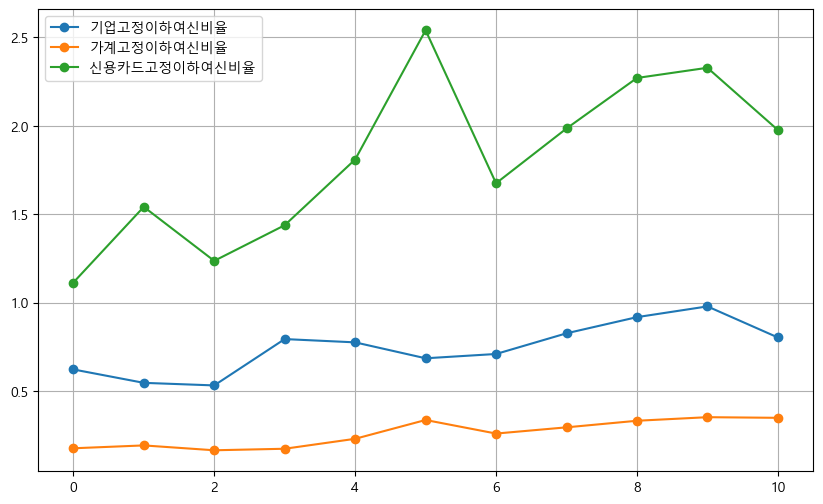

In [116]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()

df = data[['기업고정이하여신비율','가계고정이하여신비율','신용카드고정이하여신비율']]



df_plt = pd.DataFrame(df, columns=df.columns)
# 선형 플랏 그리기
plt.figure(figsize=(10, 6))
for column in df_plt.columns:
    plt.plot(df_plt.index, df_plt[column], label=column, marker='o')

# 그래프 꾸미기
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()

In [118]:
data

,시점,총여신,기업여신,기업여신비율,가계여신,가계여신비율,신용카드여신,신용카드여신비율,총고정이하여신,총고정이하여신비율,기업고정이하여신,기업고정이하여신비율,가계고정이하여신,가계고정이하여신비율,신용카드고정이하여신,신용카드고정이하여신비율,총무수익여신,무수익여신비율,기업무수익여신,기업무수익여신비율,가계무수익여신,가계무수익여신비율,신용카드무수익여신,신용카드무수익여신비율,무수익여신산정대상기준,대손충당금적립률
0,202201,492551,334894,67.99,153524,31.17,4133,0.84,2396,0.49,2081,0.62,269,0.18,46,1.11,1569,0.32,1261,0.38,263,0.17,45,1.09,3398,141.82
1,202202,507178,344469,67.92,158297,31.21,4412,0.87,2250,0.44,1879,0.55,303,0.19,68,1.54,1430,0.28,1068,0.31,294,0.19,68,1.54,3718,165.24
2,202203,516259,347868,67.38,164102,31.79,4289,0.83,2169,0.42,1847,0.53,269,0.16,53,1.24,1308,0.25,995,0.29,260,0.16,53,1.24,3728,171.88
3,202204,524415,348351,66.43,171542,32.71,4522,0.86,3124,0.60,2763,0.79,296,0.17,65,1.44,2316,0.44,1967,0.56,286,0.17,64,1.42,4278,136.94
4,202301,523948,344704,65.79,174767,33.36,4477,0.85,3151,0.60,2670,0.77,400,0.23,81,1.81,2269,0.43,1812,0.53,377,0.22,80,1.79,4560,144.72
5,202302,538332,350928,65.19,182838,33.96,4566,0.85,3131,0.58,2402,0.68,613,0.34,116,2.54,2071,0.38,1368,0.39,588,0.32,115,2.52,5051,161.32
6,202303,559364,358787,64.14,196099,35.06,4478,0.80,3125,0.56,2543,0.71,507,0.26,75,1.67,2253,0.40,1690,0.47,488,0.25,75,1.67,5235,167.52
7,202304,559243,356495,63.75,198163,35.43,4585,0.82,3617,0.65,2944,0.83,582,0.29,91,1.98,2412,0.43,1761,0.49,561,0.28,90,1.96,5470,151.23
8,202401,574283,365316,63.61,204563,35.62,4404,0.77,4128,0.72,3351,0.92,677,0.33,100,2.27,2975,0.52,2219,0.61,657,0.32,99,2.25,5765,139.66
9,202402,588074,373089,63.44,210733,35.83,4252,0.72,4488,0.76,3649,0.98,740,0.35,99,2.33,2919,0.50,2101,0.56,720,0.34,98,2.30,6336,141.18


C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\2097060664.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['신용카드여신'] = df['신용카드여신'] / df['신용카드여신'].min()
C:\Users\campus4D050\AppData\Local\Temp\ipykernel_6544\2097060664.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['신용카드고정이하여신비율'] = df['신용카드고정이하여신비율'] / df['신용카드고정이하여신비율'].min()


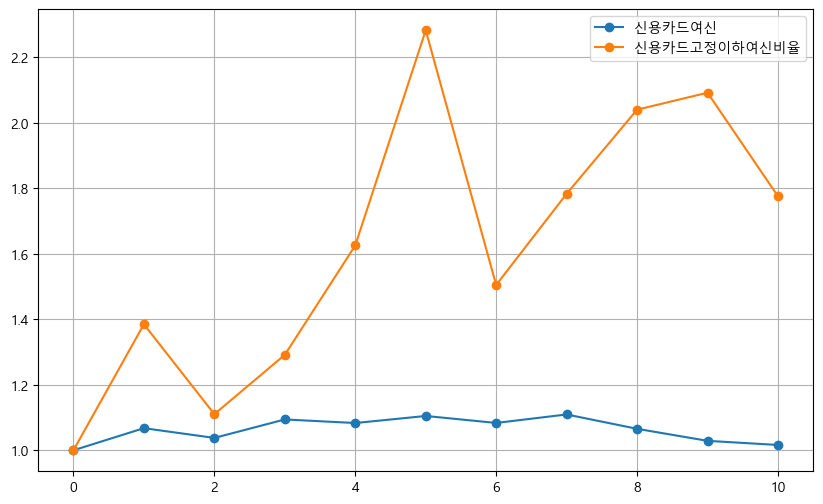

In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()

df = data[['신용카드여신','신용카드고정이하여신비율']]
df['신용카드여신'] = df['신용카드여신'] / df['신용카드여신'].min()
df['신용카드고정이하여신비율'] = df['신용카드고정이하여신비율'] / df['신용카드고정이하여신비율'].min()



df_plt = pd.DataFrame(df, columns=df.columns)
# 선형 플랏 그리기
plt.figure(figsize=(10, 6))
for column in df_plt.columns:
    plt.plot(df_plt.index, df_plt[column], label=column, marker='o')

# 그래프 꾸미기
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()

C:\Users\campus4D050\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


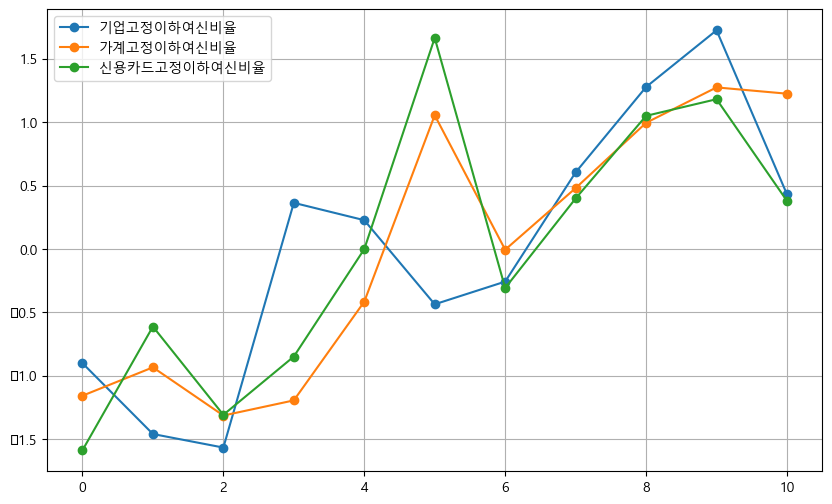

In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
df = data[['기업고정이하여신비율','가계고정이하여신비율','신용카드고정이하여신비율']]
standard_data = scaler.fit_transform(df)

df_plt = pd.DataFrame(standard_data, columns=df.columns)
# 선형 플랏 그리기
plt.figure(figsize=(10, 6))
for column in df_plt.columns:
    plt.plot(df_plt.index, df_plt[column], label=column, marker='o')

# 그래프 꾸미기
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()
